## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [5]:
customerData = pd.read_csv('dataset\customerData_Clean.csv')

## Showing the data

In [6]:
customerData

,Unnamed: 0,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
0,0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1,806,25,1950
1,1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,0,9,6,1950
2,2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,287,21,1960
3,3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,0,34,8,1980
4,4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,0,207,19,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2203,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,0,267,18,1960
2204,2204,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,0,30,22,1940
2205,2205,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,0,297,19,1980
2206,2206,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,0,324,23,1950


### Importing Machine Learning modules

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=1)

#### Try training Income and Complain using Gradient Boosting Algorithm (Classification)

C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

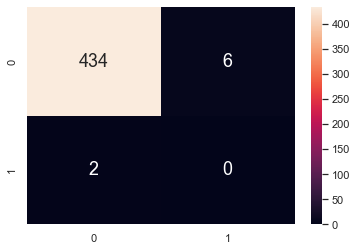

In [18]:
income = pd.DataFrame(customerData['Income'])  # Predictor
complain = pd.DataFrame(customerData['Complain'])      # Response

X_train, X_test, y_train, y_test = train_test_split(income, complain, test_size = 0.20, random_state = 1)

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Try training Income and TotalPurchase using Gradient Boosting Regression (Regression)

C:\Users\Muw\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


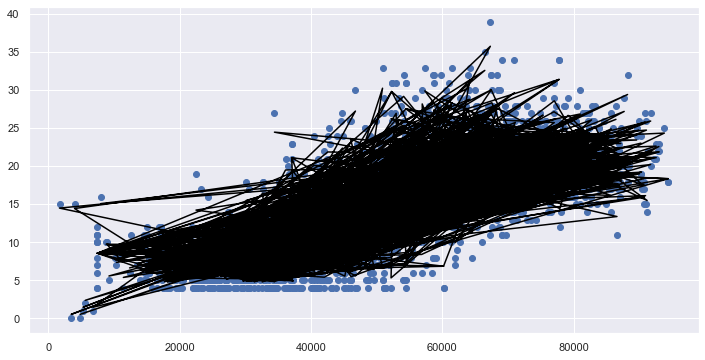

Score for the train model: 0.9364186383526142


<AxesSubplot:>

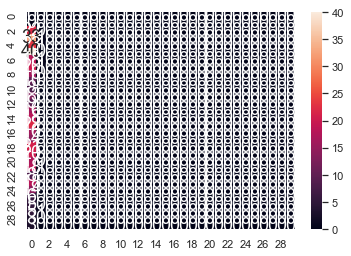

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

income = pd.DataFrame(customerData['Income'])  # Predictor
purchases = pd.DataFrame(customerData['TotalPurchase'])      # Response

X_train, X_test, y_train, y_test = train_test_split(income, purchases, test_size = 0.20, random_state = 1)

gbr = GradientBoostingRegressor(max_depth=12)
gbr.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plt.scatter(X_train, y_train)
plt.plot(X_train.to_numpy(), gbr.predict(X_train), color = 'black')
plt.show()

print("Score for the train model:", gbr.score(X_train, y_train))


y_pred = gbc.predict(X_test)

sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


HELLO


In [ ]:
prob1data.loc[['KidHome'] > 0, 'HasKids'] = True